# Text Summarization with NLP  
## A Self-Contained Extractive Summarization System Using Natural Language Processing

### Abstract  
This notebook presents an implementation of an extractive text summarization system using classical Natural Language Processing (NLP) techniques in Python. The system identifies and ranks sentences based on normalized word frequency analysis and constructs a concise summary by selecting the most informative sentences from the original text.

The project demonstrates a full NLP pipeline including preprocessing, tokenization, statistical sentence scoring, result evaluation, and visualization. The notebook is fully self-contained and designed for reproducibility, extensibility, and educational clarity.

---

### Objectives  
- Implement a complete extractive summarization pipeline inside a single Jupyter Notebook  
- Apply statistical NLP techniques for sentence ranking  
- Evaluate summarization quality using quantitative metrics  
- Visualize linguistic importance and sentence relevance  
- Design the system for future extensibility into ML-based summarization models


## Methodology Overview  

This project follows a classical frequency-based extractive summarization approach:

1. **Text Input**  
   The system accepts raw text provided by the user or loaded from a local file.

2. **Tokenization**  
   The text is segmented into sentences and words using NLTK’s Punkt tokenizer.

3. **Stopword Filtering**  
   Common low-information words are removed to focus on semantically meaningful tokens.

4. **Word Frequency Modeling**  
   Each word is assigned a normalized frequency score based on its occurrence in the text.

5. **Sentence Scoring**  
   Sentences are scored by summing the normalized frequencies of the words they contain.

6. **Summary Extraction**  
   The highest-ranking sentences are selected and assembled into the final summary.

This approach preserves the original phrasing and structure of the text while prioritizing informational density.


In [16]:
# Automated NLTK Resource Loader
import nltk

def ensure_nltk_resources():
    resources = {
        "punkt": "tokenizers/punkt",
        "punkt_tab": "tokenizers/punkt_tab",
        "stopwords": "corpora/stopwords"
    }
    for resource, path in resources.items():
        try:
            nltk.data.find(path)
        except LookupError:
            nltk.download(resource)

ensure_nltk_resources()

In [17]:
#IMPORTS & CONFIGURATION
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from string import punctuation
from heapq import nlargest
from collections import Counter
import matplotlib.pyplot as plt

## System Configuration  

This section defines configurable parameters for experimentation and evaluation. Adjust these values to observe how they affect the quality and compression of the generated summary.


In [18]:
# Configuration Parameters
SUMMARY_LENGTH = 2
MIN_WORD_LENGTH = 2
MAX_SENTENCE_LENGTH = 40
CUSTOM_STOPWORDS = set()

## Text Input  

The system supports both direct text input and file-based input. By default, the notebook uses a predefined sample text for demonstration.

In [19]:
# Input text for summarization
text = """
Artificial Intelligence (AI) is a field of computer science that aims to create machines that can perform tasks 
that would typically require human intelligence. Some common applications of AI include speech recognition, 
decision-making, visual perception, and language translation. Over the years, AI has made significant advancements 
and is now being integrated into various industries such as healthcare, finance, and transportation. However, 
the rapid development of AI also raises ethical concerns regarding job displacement, data privacy, and the potential 
for misuse of technology. Despite these challenges, AI continues to revolutionize the way we live and work, making 
it one of the most exciting and transformative fields of study in the modern era.
"""

## NLP Pipeline Implementation  

The following functions define the core processing stages of the summarization system. The pipeline is modular to improve readability, testability, and future extensibility.

In [20]:
def clean_and_tokenize(text, min_word_length):
    sentences = sent_tokenize(text)
    words = word_tokenize(text.lower())
    filtered_words = [
        word for word in words
        if word.isalnum() and
        len(word) >= min_word_length
    ]
    return sentences, filtered_words


def compute_word_frequencies(words, stop_words):
    frequency = Counter()
    for word in words:
        if word not in stop_words:
            frequency[word] += 1

    if not frequency:
        return frequency

    max_freq = max(frequency.values())
    for word in frequency:
        frequency[word] /= max_freq

    return frequency


def score_sentences(sentences, frequencies, max_sentence_length):
    sentence_scores = {}
    for sentence in sentences:
        words = word_tokenize(sentence.lower())
        if len(words) > max_sentence_length:
            continue

        for word in words:
            if word in frequencies:
                if sentence not in sentence_scores:
                    sentence_scores[sentence] = frequencies[word]
                else:
                    sentence_scores[sentence] += frequencies[word]
    return sentence_scores


def generate_summary(text, summary_length, min_word_length, max_sentence_length, custom_stopwords):
    stop_words = set(stopwords.words("english")).union(custom_stopwords)

    sentences, words = clean_and_tokenize(text, min_word_length)
    frequencies = compute_word_frequencies(words, stop_words)
    scores = score_sentences(sentences, frequencies, max_sentence_length)

    if not scores:
        return ""

    best_sentences = nlargest(summary_length, scores, key=scores.get)
    return " ".join(best_sentences), frequencies, scores, sentences

In [21]:
summary, word_frequencies, sentence_scores, original_sentences = generate_summary(
    text,
    SUMMARY_LENGTH,
    MIN_WORD_LENGTH,
    MAX_SENTENCE_LENGTH,
    CUSTOM_STOPWORDS
)

print("Original Text:\n")
print(text)

print("\nGenerated Summary:\n")
print(summary)

Original Text:


Artificial Intelligence (AI) is a field of computer science that aims to create machines that can perform tasks 
that would typically require human intelligence. Some common applications of AI include speech recognition, 
decision-making, visual perception, and language translation. Over the years, AI has made significant advancements 
and is now being integrated into various industries such as healthcare, finance, and transportation. However, 
the rapid development of AI also raises ethical concerns regarding job displacement, data privacy, and the potential 
for misuse of technology. Despite these challenges, AI continues to revolutionize the way we live and work, making 
it one of the most exciting and transformative fields of study in the modern era.


Generated Summary:


Artificial Intelligence (AI) is a field of computer science that aims to create machines that can perform tasks 
that would typically require human intelligence. However, 
the rapid development o

## Evaluation Metrics  

This section computes lightweight quantitative measures to assess summarization performance.
- **Compression Ratio**: Proportion of summary length relative to original text length  
- **Sentence Coverage**: Fraction of original sentences retained in the summary  
- **Word Retention**: Proportion of unique words preserved in the summary

In [22]:
def evaluate_summary(original_text, summary_text, original_sentences):
    original_words = set(word_tokenize(original_text.lower()))
    summary_words = set(word_tokenize(summary_text.lower()))

    compression_ratio = len(summary_text.split()) / max(1, len(original_text.split()))
    sentence_coverage = len(sent_tokenize(summary_text)) / max(1, len(original_sentences))
    word_retention = len(summary_words & original_words) / max(1, len(original_words))

    return compression_ratio, sentence_coverage, word_retention


compression, coverage, retention = evaluate_summary(
    text, summary, original_sentences
)

print("Compression Ratio:", round(compression, 3))
print("Sentence Coverage:", round(coverage, 3))
print("Word Retention:", round(retention, 3))

Compression Ratio: 0.414
Sentence Coverage: 0.4
Word Retention: 0.473


## Visualization  

This section visualizes linguistic importance and sentence relevance to improve interpretability of the summarization process.

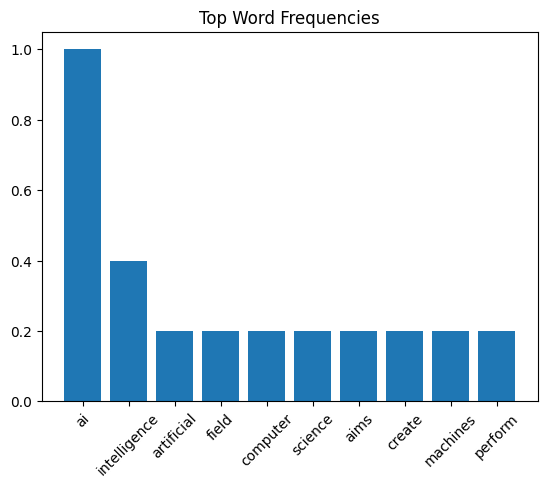

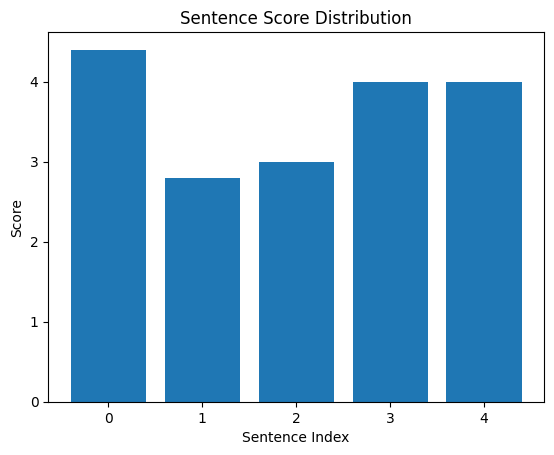

In [23]:
def plot_word_frequencies(frequencies, top_n=10):
    top_words = dict(nlargest(top_n, frequencies.items(), key=lambda x: x[1]))
    plt.figure()
    plt.bar(top_words.keys(), top_words.values())
    plt.title("Top Word Frequencies")
    plt.xticks(rotation=45)
    plt.show()


def plot_sentence_scores(sentence_scores):
    plt.figure()
    plt.bar(range(len(sentence_scores)), list(sentence_scores.values()))
    plt.title("Sentence Score Distribution")
    plt.xlabel("Sentence Index")
    plt.ylabel("Score")
    plt.show()


plot_word_frequencies(word_frequencies)
plot_sentence_scores(sentence_scores)

## Observations and Limitations  

This frequency-based extractive summarization method performs well for structured, informational texts. However, it exhibits several limitations:

- It does not capture semantic meaning or context beyond word frequency  
- It may favor longer sentences with more frequent words  
- It cannot paraphrase or generate new text  
- Performance degrades for highly narrative or creative writing

These limitations motivate the use of transformer-based abstractive summarization models in future work.

## Future Work  

Potential extensions to this project include:
- Integration of transformer-based models such as BERT, T5, or GPT for abstractive summarization  
- Implementation of ROUGE-based evaluation metrics  
- Multilingual language support  
- PDF and web article ingestion  
- Deployment as a web application using Streamlit or Flask